In [1]:
import pandas as pd
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [27]:
def read_data():
    #read the pickled data
    pickle_in = open(os.path.join(os.getcwd(), 'data', 'processed', 'all_data.pickle'), 'rb')
    data = pickle.load(pickle_in)

    #This copy will hold the inflation adjusted values
    data_orig = data.copy()

    #the scorers for monetary variables is the middle value of the bin with assumed
    #values for the uppermost bin
    income_scorer = np.array([5, 12.5, 17.5, 22.5, 27.5, 32.5, 37.5, 42.5, 47.5,
                              55, 67.5, 87.5, 112.5, 137.5, 175, 300]) * 1000
    rent_scorer = np.array([50, 125, 175, 225, 275, 325, 375, 425, 475, 525, 575,
                            625, 675, 725, 775, 850, 950, 1125, 1375, 1750, 2500])
    value_scorer = np.array([5, 12.5, 17.5, 22.5, 27.5, 32.5, 27.5, 45, 55, 65, 75, 
                             85, 95, 112.5, 137.5, 162.5, 187.5, 225, 275, 350, 450, 
                             625, 875, 1500]) * 1000
    #education gets a simple 1-8 score
    education_scorer = np.arange(1, 8)

    #to adjust the values to 2016 dollars, the index are adjusted by the 
    #yearly average consumer price index 
    inflation_correction = np.array([1.39422697, 1.11865482, 1.10084296, 1.06686838,
                                     1.04536021, 1.03039158, 1.01380104, 1.01263642, 
                                     1.00000000])

    #these are special cases and need to be dropped (make description below)
    to_drop = [48453980000, 48453002319, 48453001606]

    for i, year in enumerate(data.keys()):
        for key in data[year].keys():
            tmp = data[year][key]
            #bust out the total population from the race df
            if key == 'race':
                population = tmp['total_population'].to_frame()
            if key == 'unemployment':
                tmp['employed'] = tmp['total_in_labor_force'] - tmp['unemployed']
            #convert columns to percentages and drop the total
            tmp = tmp[tmp.columns[1:]].divide(tmp[tmp.columns[0]], axis=0).fillna(0)
            #calculate the index (single number to represent bins) 
            if len(tmp.columns) > 1:
                if key == 'income':
                    tmp['income_index'] = tmp.dot(income_scorer) * inflation_correction[i]
                elif key == 'rent':
                    tmp['rent_index'] = tmp.dot(rent_scorer) * inflation_correction[i]
                elif key == 'value':
                    tmp['value_index'] = tmp.dot(value_scorer) * inflation_correction[i]
                elif key == 'education':
                    tmp['education_index'] = tmp.dot(education_scorer)
            #put the new percentage dataframe back in
            data[year][key] = tmp[tmp.columns[-1]].copy().drop(to_drop).to_frame()
        data[year] = pd.concat([data[year][key] for key in data[year].keys()], axis=1)
        data[year]['year'] = year
    return data, data_orig

In [31]:
data['2000'].index = zip(data['2000'].index, data['2000']['year'])

In [38]:
data['2000'].columns[::-1]

Index(['year', 'employed', 'value_index', 'rent_index', 'white_alone',
       'education_index', 'income_index'],
      dtype='object')

In [28]:
data, data_orig = read_data()
x = pd.concat([data[year] for year in data.keys()])
x.head()

,income_index,education_index,white_alone,rent_index,value_index,employed,year
geoid,,,,,,,
48021950100,73599.981153,3.617289,0.861927,723.087018,153375.729370,0.983089,2000
48021950200,67668.904461,3.154098,0.675920,752.448335,118748.232408,0.967152,2000
48021950300,78678.935400,3.669384,0.810971,808.205215,178808.676101,0.970323,2000
48021950400,75438.539903,4.075207,0.766053,869.478211,158917.899778,0.983405,2000
48021950600,67172.153161,3.465056,0.889213,737.822784,134719.422878,0.968913,2000


In [19]:
for col in x.columns:
    print(col, x[x[col] == 0])

income_index Empty DataFrame
Columns: [income_index, education_index, white_alone, rent_index, value_index, employed]
Index: []
education_index Empty DataFrame
Columns: [income_index, education_index, white_alone, rent_index, value_index, employed]
Index: []
white_alone Empty DataFrame
Columns: [income_index, education_index, white_alone, rent_index, value_index, employed]
Index: []
rent_index               income_index  education_index  white_alone  rent_index  \
geoid                                                                  
48453001916  196777.138330         6.024712     0.841978         0.0   
48491020109  127231.845177         4.849755     0.931227         0.0   
48453001916  205971.206893         6.178441     0.848737         0.0   
48491020109  136659.007316         4.908183     0.922083         0.0   
48453001916  205590.327169         6.186397     0.832890         0.0   
48453001917  174744.160525         6.023046     0.872031         0.0   

               value_index

In [26]:
x.loc[48453001916]

,income_index,education_index,white_alone,rent_index,value_index,employed
geoid,,,,,,
48453001916,216038.217983,5.824662,0.906592,3142.701405,490996.576171,0.988698
48453001916,195620.030495,5.974482,0.867913,1897.874673,597845.356813,0.962112
48453001916,196777.138330,6.024712,0.841978,0.000000,724128.195215,0.970037
48453001916,205971.206893,6.178441,0.848737,0.000000,731532.250559,0.980185
48453001916,205590.327169,6.186397,0.832890,0.000000,710523.553739,0.984113
48453001916,206959.643539,6.145557,0.859659,1416.788423,747896.205138,0.996051
48453001916,220376.900590,6.148981,0.870528,1173.584900,752254.838654,0.989986
48453001916,217298.968540,6.046875,0.876036,1554.115617,674199.104112,0.985992
48453001916,205592.998955,5.901531,0.879364,1505.434783,714371.569704,0.980009


In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_s = pd.DataFrame(scaler.fit_transform(x), index=x.index, columns=x.columns)
x_s.describe()

,income_index,education_index,white_alone,rent_index,value_index,employed
count,3.123000e+03,3.123000e+03,3.123000e+03,3.123000e+03,3.123000e+03,3.123000e+03
mean,3.467892e-17,5.616882e-18,9.662460e-16,-4.906596e-16,8.315119e-17,-2.964647e-15
std,1.000160e+00,1.000160e+00,1.000160e+00,1.000160e+00,1.000160e+00,1.000160e+00
min,-2.009881e+00,-2.531423e+00,-4.202546e+00,-3.737762e+00,-1.696509e+00,-6.931418e+00
25%,-7.015586e-01,-7.771712e-01,-5.904487e-01,-6.639054e-01,-6.356295e-01,-4.666847e-01
50%,-2.057591e-01,8.892251e-02,2.479851e-01,-1.780713e-01,-2.988940e-01,1.725971e-01
75%,4.601948e-01,7.716397e-01,7.428748e-01,4.883260e-01,3.044597e-01,6.747347e-01
max,4.776305e+00,2.077267e+00,1.518880e+00,6.153849e+00,5.715703e+00,1.650901e+00


## Elbow method

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


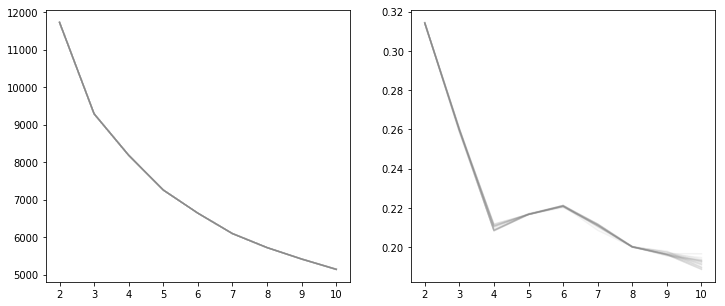

In [12]:
from sklearn.cluster import KMeans
import scikitplot as skplt
from sklearn.metrics import silhouette_score

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
for j in range(20):
    print(j)
    wcss = []
    sil = []
    for i in range(2, 11):
        kmeans = KMeans(n_clusters=i)
        kmeans.fit(x_s)
        wcss.append(kmeans.inertia_)
        sil.append(silhouette_score(x_s, kmeans.labels_))
        #skplt.metrics.plot_silhouette(x_s, kmeans.labels_)
    ax1.plot(range(2, 11), wcss, color='gray', alpha=0.1)
    ax2.plot(range(2, 11), sil, color='gray', alpha=0.1)

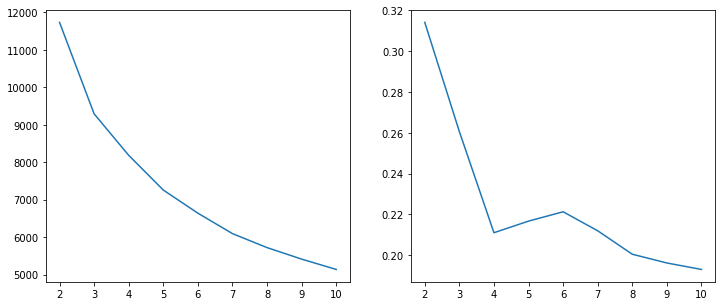

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
ax1.plot(range(2, 11), wcss)
ax2.plot(range(2, 11), sil)

In [15]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(x_s)
print(pca.explained_variance_ratio_)
pca.fit(x)
print(pca.explained_variance_ratio_)

[ 0.58580751  0.13547128  0.11569097  0.08623516  0.04969926  0.02709582]
[  9.75846744e-01   2.41508193e-02   2.43635681e-06   1.32022406e-11
   6.69207479e-13   5.04168240e-14]


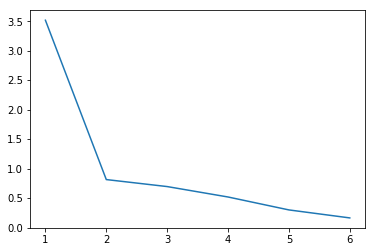

In [14]:
plt.plot(range(1, 7), pca.explained_variance_)